# 🏦 Bank Customer Churn Analysis


In [1]:
# Install libraries
!pip install -q pandas scikit-learn xgboost matplotlib

### 📥 Load Dataset

In [2]:
# Load libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 🔍 Dataset Overview

In [3]:
# View dataset shape and structure
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.info()
df.describe()

Rows: 10000, Columns: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 🎯 Distribution of Target Variable (Exited)

In [4]:
# Check churn rate
df['Exited'].value_counts(normalize=True) * 100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

### 📊 Churn by Gender

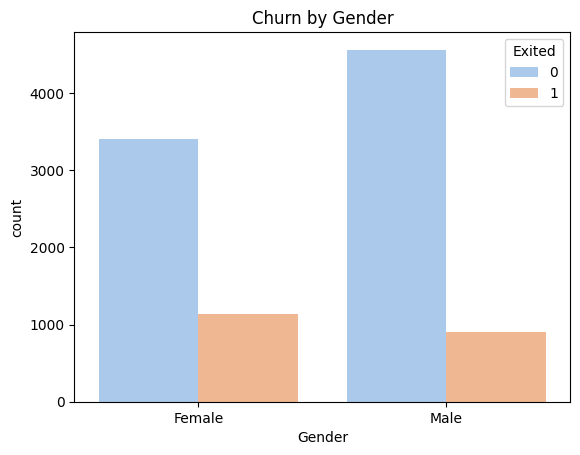

In [5]:
sns.countplot(x='Gender', hue='Exited', data=df, palette='pastel')
plt.title('Churn by Gender')
plt.show()

### 📊 Churn by Age

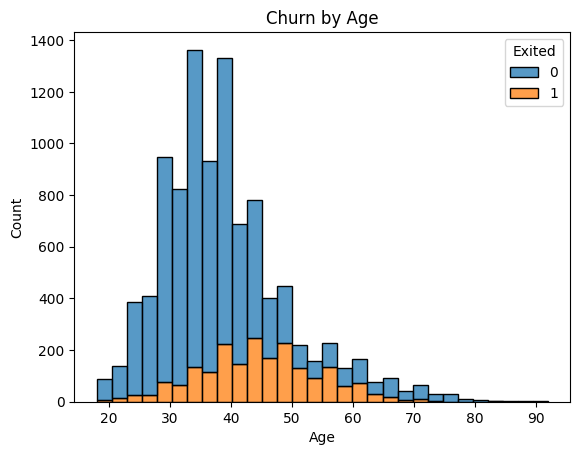

In [6]:
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=30)
plt.title('Churn by Age')
plt.show()

### 📊 Correlation Matrix

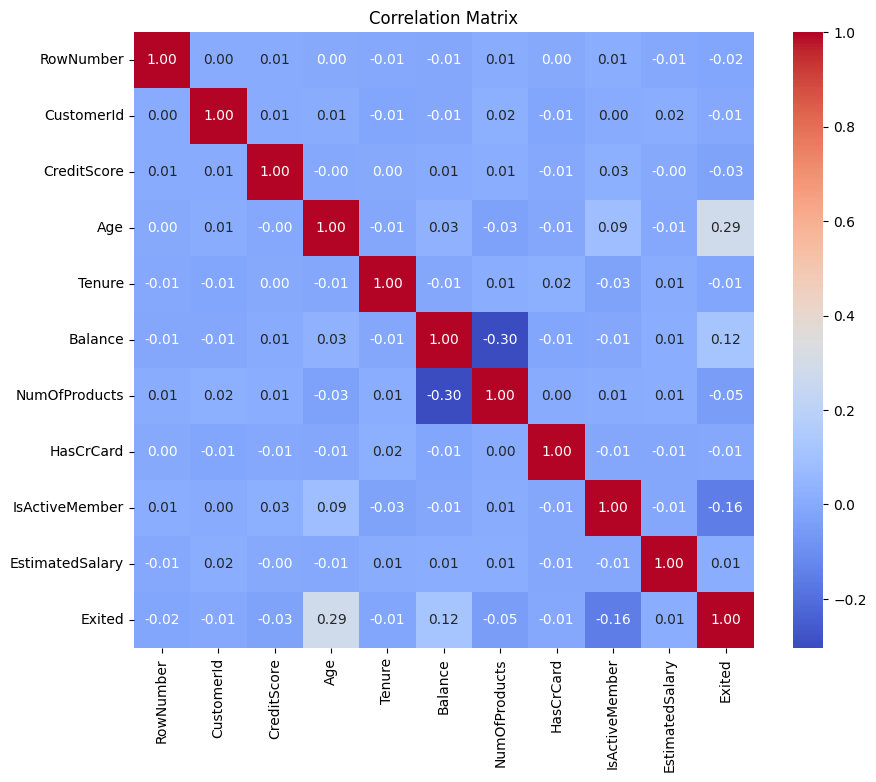

In [7]:
# Select only numerical columns for correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 🧹 Drop Irrelevant Columns

In [8]:
# Drop useful columns 
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 🔄 Encode Categorical Variables

In [9]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### 📂 Separate Features and Target

In [10]:
X = df.drop('Exited', axis=1)
y = df['Exited']

print("Features shape:", X.shape)
print("Target distribution:")
print(y.value_counts(normalize=True))

Features shape: (10000, 11)
Target distribution:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


### 📚 Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (8000, 11)
Test set: (2000, 11)


### 📚 Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🔍 Feature Selection with RFE

In [13]:
# Recursive Feature Elimination(RFE) to select the top 10 most important features
# Use Logistic Regression as the base estimator for RFE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

print("Selected features:")
print(selected_features)

Selected features:
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Gender_Male'],
      dtype='object')


## ✅ Logistic Regression

In [14]:
# Train a logistic regression model with class balancing to handle data imbalance

from sklearn.metrics import classification_report, confusion_matrix

lr_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_balanced.fit(X_train_selected, y_train)
y_pred_lr = lr_balanced.predict(X_test_selected)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, digits=4))

[[1140  453]
 [ 121  286]]
              precision    recall  f1-score   support

           0     0.9040    0.7156    0.7989      1593
           1     0.3870    0.7027    0.4991       407

    accuracy                         0.7130      2000
   macro avg     0.6455    0.7092    0.6490      2000
weighted avg     0.7988    0.7130    0.7379      2000



## 🌳 Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))

[[1539   54]
 [ 222  185]]
              precision    recall  f1-score   support

           0     0.8739    0.9661    0.9177      1593
           1     0.7741    0.4545    0.5728       407

    accuracy                         0.8620      2000
   macro avg     0.8240    0.7103    0.7452      2000
weighted avg     0.8536    0.8620    0.8475      2000



## ⚙️ XGBoost Classifier

In [16]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_selected, y_train)
y_pred_xgb = xgb_model.predict(X_test_selected)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=4))

[[1501   92]
 [ 209  198]]
              precision    recall  f1-score   support

           0     0.8778    0.9422    0.9089      1593
           1     0.6828    0.4865    0.5681       407

    accuracy                         0.8495      2000
   macro avg     0.7803    0.7144    0.7385      2000
weighted avg     0.8381    0.8495    0.8395      2000



## 📊 Model Performance Comparison

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics using predictions from each model
metrics = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_lr),
        "Precision": precision_score(y_test, y_pred_lr),
        "Recall": recall_score(y_test, y_pred_lr),
        "F1-Score": f1_score(y_test, y_pred_lr),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1-Score": f1_score(y_test, y_pred_rf),
    },
    "XGBoost": {
        "Accuracy": accuracy_score(y_test, y_pred_xgb),
        "Precision": precision_score(y_test, y_pred_xgb),
        "Recall": recall_score(y_test, y_pred_xgb),
        "F1-Score": f1_score(y_test, y_pred_xgb),
    }
}

# Convert the metrics dictionary into a transposed DataFrame
results_df = pd.DataFrame(metrics).T.round(4)

### 📊 Metrics Comparison Table

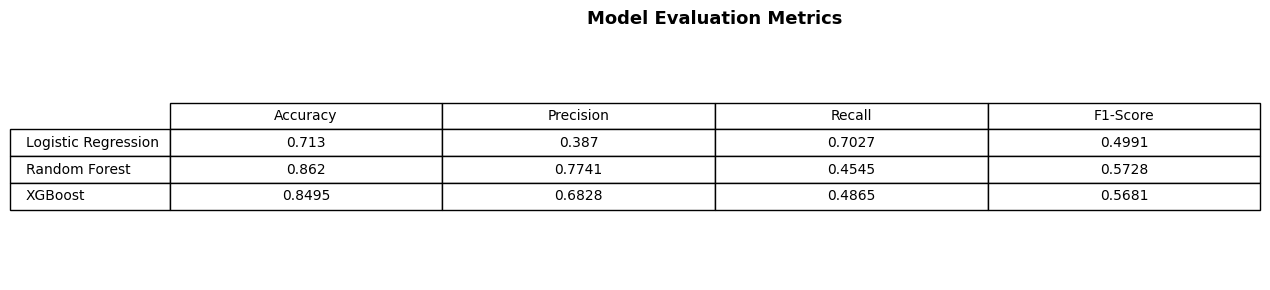

In [27]:
# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(13, 3))  # Adjust the figure size as needed

# Turn off axis lines and ticks
ax.axis('off')

# Create the table using results_df
table = ax.table(cellText=results_df.values,
                 colLabels=results_df.columns,
                 rowLabels=results_df.index,
                 loc='center',
                 cellLoc='center')

# Customize the table appearance
table.scale(1.2, 1.5)            # Adjust cell size
table.auto_set_font_size(False) # Disable auto font scaling
table.set_fontsize(10)          # Set a readable font size

# Add a title above the table
plt.title("Model Evaluation Metrics", fontsize=13, fontweight='bold')

# Improve layout and display
plt.tight_layout()
plt.show()

#plt.savefig("model_evaluation_table.png", dpi=300)

### 📈 Visualize Model Metrics

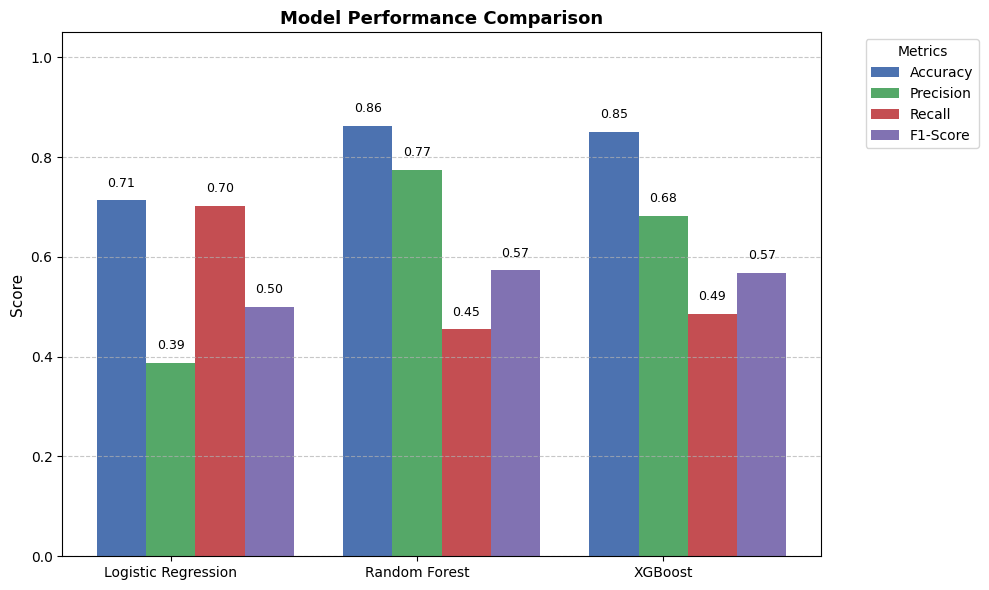

In [28]:

# Define colors and labels
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2"]
metrics = results_df.columns
models = results_df.index

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = range(len(models))

# Draw bars and add value labels above each bar
for i, metric in enumerate(metrics):
    values = results_df[metric]
    bars = ax.bar([x + i * bar_width for x in index], values, bar_width,
                  label=metric, color=colors[i])
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 10),  # move the label slightly above the bar
                    textcoords='offset points',
                    ha='center', fontsize=9)

# Configure x-axis and other visual elements
ax.set_xticks([r + bar_width for r in range(len(models))])
ax.set_xticklabels(models, fontsize=10)
ax.set_ylim(0, 1.05)
ax.set_ylabel("Score", fontsize=11)
ax.set_title("Model Performance Comparison", fontsize=13, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')  # place legend outside

plt.tight_layout()
#plt.savefig("model_performance_comparison.png", dpi=300)
plt.show()


## 🧠 Conclusions and Insights

This study aimed to predict customer churn in the banking sector by evaluating the performance of three machine learning models: **Logistic Regression**, **Random Forest**, and **XGBoost**.

Based on the performance comparison:

- **XGBoost** delivered the best overall results in terms of accuracy, precision, recall, and F1-score.
- **Random Forest** achieved reasonable performance with balanced metric scores.
- **Logistic Regression** served as a baseline model and showed comparatively lower performance.

These findings demonstrate the effectiveness of machine learning models in predicting customer behavior. In particular, high-performing models can support targeted retention strategies and help reduce churn through proactive business actions.
